# Exercise 6

In [1]:
# a 
exp(-6 +40*0.05+3.5)/(1 + exp(-6 +40*0.05+3.5))

[1] 0.3775407

In [2]:
# b
# 0.5 = exp(-6 +X*0.05+3.5)/(1 + exp(-6 +X*0.05+3.5))
# exp(-6 +X*0.05+3.5) = 1
print('X equals to:')
print(2.5/0.05)


[1] "X equals to:"
[1] 50


# Exercise 8

In [3]:
# K = 1 ==> 0% error rate on training set ==> 36% (18*2) error rate on test set ==> Logistuc regression is better

# Exercise 9

In [4]:
# a
# odds = p(x)/(1-p(x)) = 0.37
# ==> p(x) = 0.37 * (1 - p(x)) ==> p(x) = 0.37 - 0.37 *p(x) ==> 1.37*p(x) = 0.37 ==> p(x) = 0.27
print('P(x) = 0.27')

[1] "P(x) = 0.27"


In [5]:
# b
# p(x)/(1-p(x)) = 0.16/(1-0.16) = 0.19
print(' Odds are 0.19')



[1] " Odds are 0.19"


# Exercise 10

In [6]:
library(ISLR)
attach(Weekly)

      Year           Lag1               Lag2               Lag3         
 Min.   :1990   Min.   :-18.1950   Min.   :-18.1950   Min.   :-18.1950  
 1st Qu.:1995   1st Qu.: -1.1540   1st Qu.: -1.1540   1st Qu.: -1.1580  
 Median :2000   Median :  0.2410   Median :  0.2410   Median :  0.2410  
 Mean   :2000   Mean   :  0.1506   Mean   :  0.1511   Mean   :  0.1472  
 3rd Qu.:2005   3rd Qu.:  1.4050   3rd Qu.:  1.4090   3rd Qu.:  1.4090  
 Max.   :2010   Max.   : 12.0260   Max.   : 12.0260   Max.   : 12.0260  
      Lag4               Lag5              Volume            Today         
 Min.   :-18.1950   Min.   :-18.1950   Min.   :0.08747   Min.   :-18.1950  
 1st Qu.: -1.1580   1st Qu.: -1.1660   1st Qu.:0.33202   1st Qu.: -1.1540  
 Median :  0.2380   Median :  0.2340   Median :1.00268   Median :  0.2410  
 Mean   :  0.1458   Mean   :  0.1399   Mean   :1.57462   Mean   :  0.1499  
 3rd Qu.:  1.4090   3rd Qu.:  1.4050   3rd Qu.:2.05373   3rd Qu.:  1.4050  
 Max.   : 12.0260   Max.   : 12.0

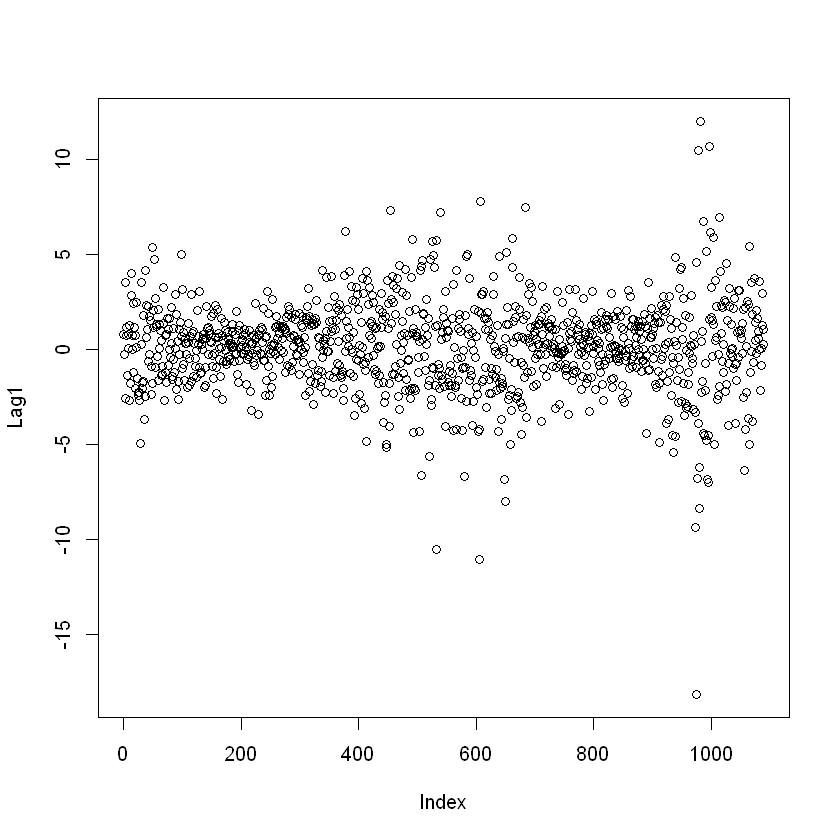

In [7]:
# a
summary(Weekly)
plot(Lag1)

In [8]:
# b
log <- glm(Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume, data = Weekly, family = binomial)
summary(log)


Call:
glm(formula = Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + 
    Volume, family = binomial, data = Weekly)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6949  -1.2565   0.9913   1.0849   1.4579  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  0.26686    0.08593   3.106   0.0019 **
Lag1        -0.04127    0.02641  -1.563   0.1181   
Lag2         0.05844    0.02686   2.175   0.0296 * 
Lag3        -0.01606    0.02666  -0.602   0.5469   
Lag4        -0.02779    0.02646  -1.050   0.2937   
Lag5        -0.01447    0.02638  -0.549   0.5833   
Volume      -0.02274    0.03690  -0.616   0.5377   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1496.2  on 1088  degrees of freedom
Residual deviance: 1486.4  on 1082  degrees of freedom
AIC: 1500.4

Number of Fisher Scoring iterations: 4


In [9]:
# c
prob <- predict(log, type = "response")
pred <- rep("Down", length(prob))
pred[prob > 0.5] <- "Up"
table(pred, Direction)


      Direction
pred   Down  Up
  Down   54  48
  Up    430 557

In [10]:
# d
train <- (Year < 2009)
Weeklyd <- Weekly[!train, ]
Directiond <- Direction[!train]
fitd <- glm(Direction ~ Lag2, data = Weekly, family = binomial, subset = train)
summary(fitd)
prob <- predict(fitd, Weeklyd, type = "response")
pred <- rep("Down", length(prob))
pred[prob > 0.5] <- "Up"
table(pred, Directiond)


Call:
glm(formula = Direction ~ Lag2, family = binomial, data = Weekly, 
    subset = train)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.536  -1.264   1.021   1.091   1.368  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  0.20326    0.06428   3.162  0.00157 **
Lag2         0.05810    0.02870   2.024  0.04298 * 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1354.7  on 984  degrees of freedom
Residual deviance: 1350.5  on 983  degrees of freedom
AIC: 1354.5

Number of Fisher Scoring iterations: 4


      Directiond
pred   Down Up
  Down    9  5
  Up     34 56

In [11]:
# e
library(MASS)
fit_lda<- lda(Direction ~ Lag2, data = Weekly, subset = train)
fit_lda
pred <- predict(fit_lda, Weeklyd)
table(pred$class, Directiond)

Call:
lda(Direction ~ Lag2, data = Weekly, subset = train)

Prior probabilities of groups:
     Down        Up 
0.4477157 0.5522843 

Group means:
            Lag2
Down -0.03568254
Up    0.26036581

Coefficients of linear discriminants:
           LD1
Lag2 0.4414162

      Directiond
       Down Up
  Down    9  5
  Up     34 56

In [12]:
# f
fit_qda <- qda(Direction ~ Lag2, data = Weekly, subset = train)
fit_qda
pred_qda <- predict(fit_qda, Weeklyd)
table(pred_qda$class, Directiond)

Call:
qda(Direction ~ Lag2, data = Weekly, subset = train)

Prior probabilities of groups:
     Down        Up 
0.4477157 0.5522843 

Group means:
            Lag2
Down -0.03568254
Up    0.26036581

      Directiond
       Down Up
  Down    0  0
  Up     43 61

In [13]:
#g
library(class)
train_knn <- as.matrix(Lag2[train])
test_knn <- as.matrix(Lag2[!train])
train_Direction <- Direction[train]
set.seed(1)
pred_knn <- knn(train_knn, test_knn, train_Direction, k = 1)
table(pred_knn, Directiond)

        Directiond
pred_knn Down Up
    Down   21 30
    Up     22 31

In [14]:
# h
# Logistic regression and LDA have the minimum errors


# Exercise 11

In [15]:
# a
attach(Auto)
mpg_dummy <- rep(0, length(mpg))
mpg_dummy[mpg > median(mpg)] <- 1


In [16]:
Auto <- data.frame(Auto,mpg_dummy)
head(Auto)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg_dummy
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>
1,18,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu,0
2,15,8,350,165,3693,11.5,70,1,buick skylark 320,0
3,18,8,318,150,3436,11.0,70,1,plymouth satellite,0
4,16,8,304,150,3433,12.0,70,1,amc rebel sst,0
5,17,8,302,140,3449,10.5,70,1,ford torino,0
6,15,8,429,198,4341,10.0,70,1,ford galaxie 500,0


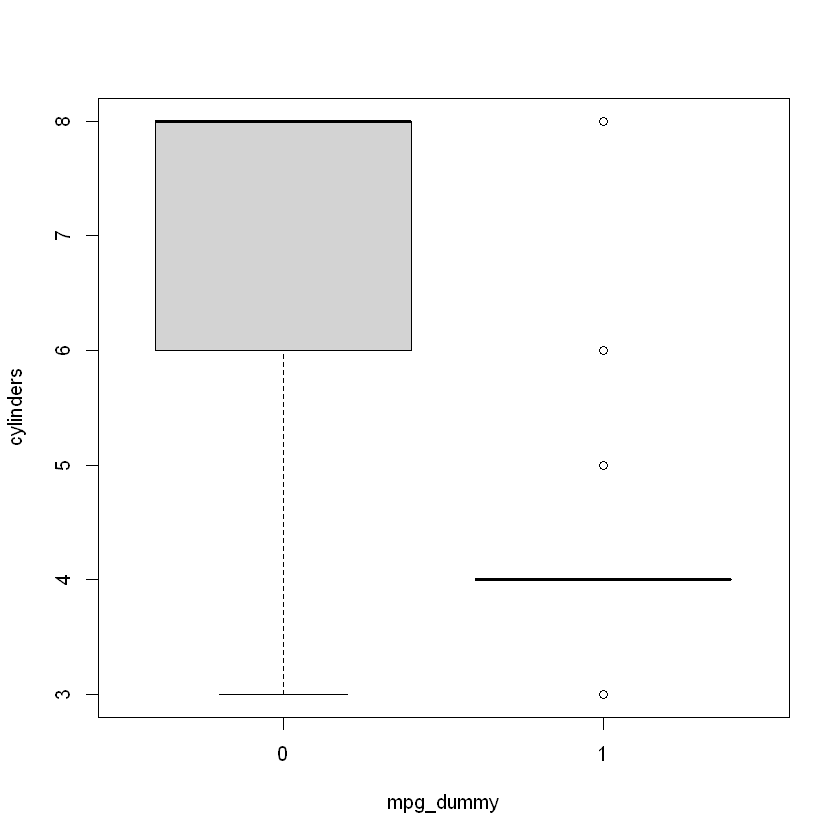

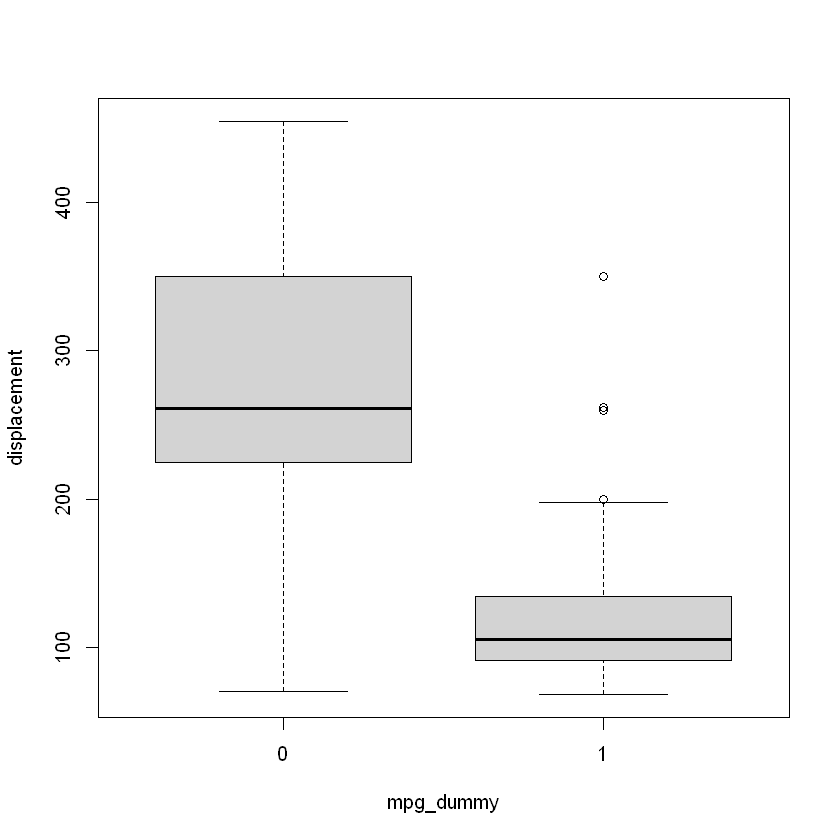

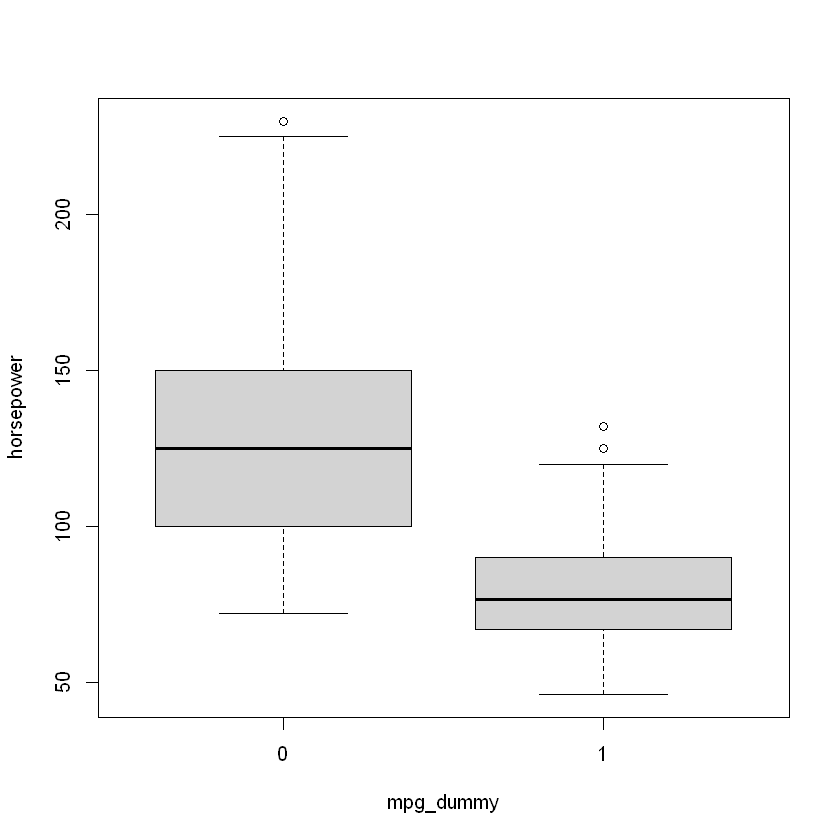

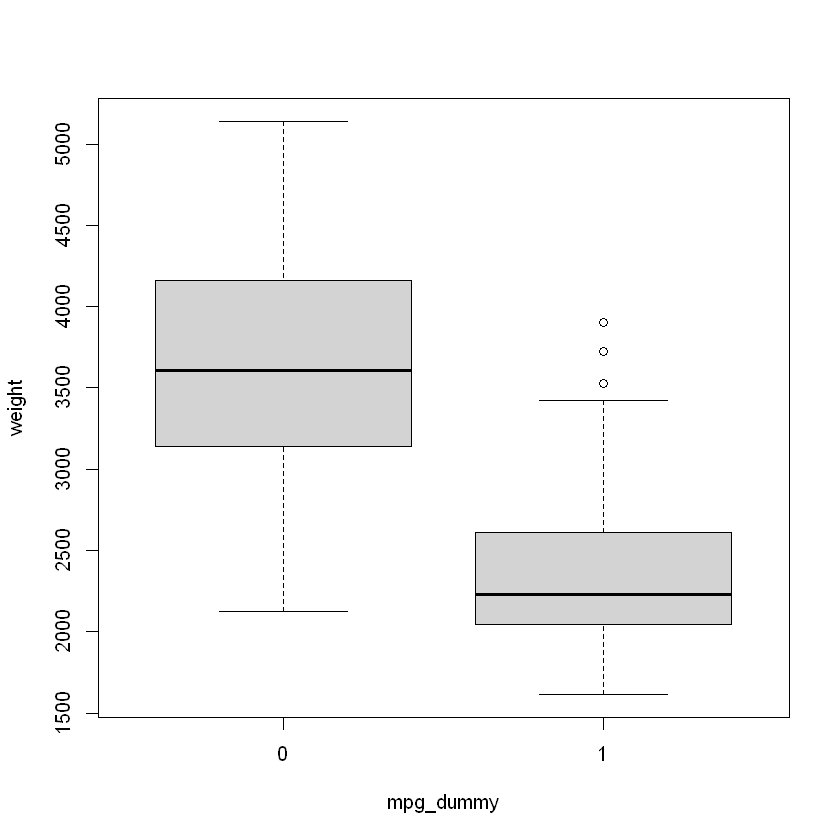

In [19]:
# b
boxplot(cylinders ~ mpg_dummy, data = Auto)
boxplot(displacement ~ mpg_dummy, data = Auto)
boxplot(horsepower ~ mpg_dummy, data = Auto)
boxplot(weight ~ mpg_dummy, data = Auto)
# We conclude that there is a relationship between all of them with the mpg dummy.

In [ ]:
# c
train <- (year %% 2 == 0)
Auto.train <- Auto[train, ]
Auto.test <- Auto[!train, ]
mpg01.test <- mpg01[!train]